In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [2]:
np.random.seed(42)

n_products = 100

# Assign half to control, half to treatment
product_ids = np.arange(1, n_products + 1)
group = np.random.choice(["control", "treatment"], size=n_products)

# Generate random profits before promotion
profit_before = np.random.normal(loc=100, scale=20, size=n_products)

# Generate profits after promotion
profit_after = profit_before + np.where(group == "treatment",
                                        np.random.normal(loc=25, scale=5, size=n_products),  # Treatment effect
                                        np.random.normal(loc=3, scale=5, size=n_products))   # Control fluctuation

# Create DataFrame
df = pd.DataFrame({
    "product_agg_level": product_ids,
    "group": group,
    "profit_before": profit_before,
    "profit_after": profit_after
})

In [3]:
df.head()

,product_agg_level,group,profit_before,profit_after
0,1,control,114.769332,113.806728
1,2,treatment,103.427366,134.963079
2,3,control,97.687034,103.211971
3,4,control,93.977926,101.306702
4,5,control,70.429560,67.428078


In [4]:
# Reshape for Difference-in-Differences Analysis
df_melted = df.melt(id_vars=["product_agg_level", "group"], var_name="time", value_name="profit")
df_melted["post"] = df_melted["time"].apply(lambda x: 1 if x == "profit_after" else 0)

df_melted.head()

,product_agg_level,group,time,profit,post
0,1,control,profit_before,114.769332,0
1,2,treatment,profit_before,103.427366,0
2,3,control,profit_before,97.687034,0
3,4,control,profit_before,93.977926,0
4,5,control,profit_before,70.429560,0


In [5]:
# Run Difference-in-Differences regression
model = smf.ols("profit ~ group * post", data=df_melted).fit()

In [6]:
# Summary of the model
model_summary = model.summary()
model_summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 profit   R-squared:                       0.230
Model:                            OLS   Adj. R-squared:                  0.218
Method:                 Least Squares   F-statistic:                     19.50
Date:                Wed, 26 Feb 2025   Prob (F-statistic):           4.17e-11
Time:                        10:01:47   Log-Likelihood:                -872.45
No. Observations:                 200   AIC:                             1753.
Df Residuals:                     196   BIC:                             1766.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 101.1920      2.890     35.012      0.000      95.492     106.892
group[T.treatment]         -3.2066      3.862     -0.830      0.407     -10.823       4.410
post                        3.4978      4.087      0.856      0.393      -4.563      11.559
group[T.treatment]:post    22.0206      5.462      4.032      0.000      11.249      32.792
==============================================================================
Omnibus:                        0.309   Durbin-Watson:                   2.191
Prob(Omnibus):                  0.857   Jarque-Bera (JB):                0.111
Skew:                           0.029   Prob(JB):                        0.946
Kurtosis:                       3.100   Cond. No.                         7.29
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

C:\Users\gokcem.yigit\AppData\Local\Temp\ipykernel_10920\1557671986.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="group", y="profit_difference", data=df, palette=["blue", "orange"])


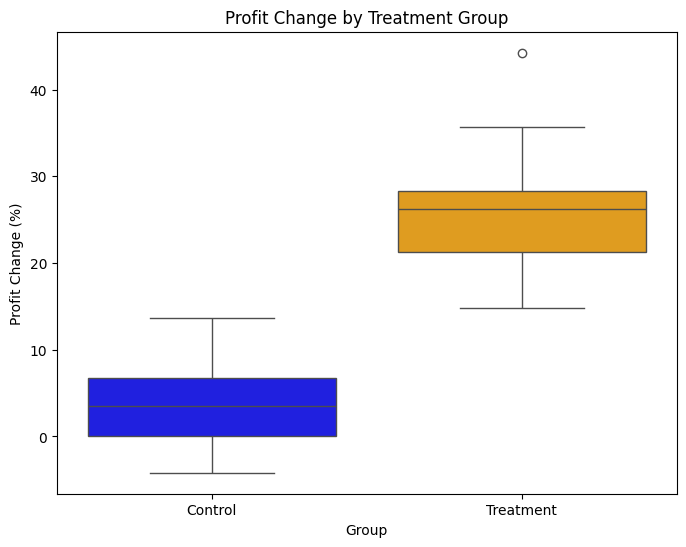

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
df["profit_difference"]= df["profit_after"]-df["profit_before"]
# Create box plot
plt.figure(figsize=(8, 6))
sns.boxplot(x="group", y="profit_difference", data=df, palette=["blue", "orange"])

plt.xticks(ticks=[0, 1], labels=["Control", "Treatment"])
plt.xlabel("Group")
plt.ylabel("Profit Change (%)")
plt.title("Profit Change by Treatment Group")

plt.show()
